In [1]:
import numpy as np
from macpp import MACPPAgent, MACPP
from maf import Grid
import matplotlib.pyplot as plt
import json
from matplotlib import colors
import time
import os
%load_ext autoreload
%autoreload 2

In [2]:
l,b=50,50
grid=np.ones((l,b))
grid[:int(l*.3),:int(l*.3)]=0
grid[int(l*.7):,int(l*.7):]=0
grid[int(l*.7):,:int(l*.3)]=0
grid[:int(l*.3),int(l*.7):]=0
grid[int(l*.35):int(l*.65),int(l*.35):int(l*.65)]=0
grid[int(l*.15):int(l*.17),:]=0
grid[int(l*.17):int(l*.85),int(l*.49):int(l*.51)]=0
grid[int(l*.85):int(l*.87),:]=0
grid[:,int(l*.15):int(l*.17)]=0
grid[:,int(l*.85):int(l*.87)]=0

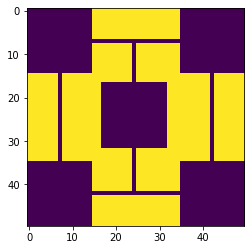

In [3]:
plt.imshow(grid)

In [24]:
#g=Grid('new_map.json')
#grid=g.return_grid()
m=MACPP(grid,4)
agents=[]
n=12
#randomize start points in every experiment
x,y=m.convert(0,0)
#print(m.n*x+y)
crds=np.ones(n)*(m.n*x+y)
for i in range(n):
    agents.append(MACPPAgent(0,0,i,m))
    
coverage_percentage=[]

In [25]:
len(m.graph)

2452

In [26]:
i=0
while m.marked_visited()<1:
    if agents[i%n].state():
        crds[i%n]=agents[i%n].next(crds)
    i+=1
    if i%n==0:
        coverage_percentage.append(m.marked_visited())
    if len(coverage_percentage)>3000:
        print('Warning')

Run with 1 agents finished in 2488 moves
Run with 2 agents finished in 1272 moves
Run with 3 agents finished in 864 moves
Run with 4 agents finished in 652 moves
Run with 5 agents finished in 565 moves
Run with 6 agents finished in 441 moves
Run with 7 agents finished in 419 moves
Run with 8 agents finished in 362 moves
Run with 9 agents finished in 348 moves
Run with 10 agents finished in 295 moves
Run with 11 agents finished in 299 moves
Run with 12 agents finished in 272 moves
Run with 13 agents finished in 255 moves
Run with 14 agents finished in 231 moves
Run with 15 agents finished in 233 moves
Run with 16 agents finished in 249 moves
Run with 17 agents finished in 250 moves
Run with 18 agents finished in 209 moves
Run with 19 agents finished in 222 moves
Run with 20 agents finished in 210 moves


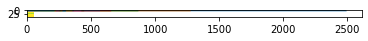

In [27]:
for l,b in zip([50,50],[100,100]):
    for n in range(1,21):
        for run in range(20):
            grid=np.ones((l,b))
            grid[:int(l*.3),:int(l*.3)]=0
            grid[int(l*.7):,int(l*.7):]=0
            grid[int(l*.7):,:int(l*.3)]=0
            grid[:int(l*.3),int(l*.7):]=0
            grid[int(l*.35):int(l*.65),int(l*.35):int(l*.65)]=0
            grid[int(l*.15):int(l*.17),:]=0
            grid[int(l*.17):int(l*.85),int(l*.49):int(l*.51)]=0
            grid[int(l*.85):int(l*.87),:]=0
            grid[:,int(l*.15):int(l*.17)]=0
            grid[:,int(l*.85):int(l*.87)]=0
            m=MACPP(grid,4)
            agents=[]
            #randomize start points in every experiment
            x,y=m.convert(0,0)
            #print(m.n*x+y)
            crds=np.ones(n)*(m.n*x+y)
            for i in range(n):
                agents.append(MACPPAgent(0,0,i,m))

            coverage_percentage=[]
            i=0
            while m.marked_visited()<1:
                if agents[i%n].state():
                    crds[i%n]=agents[i%n].next(crds)
                i+=1
                if i%n==0:
                    coverage_percentage.append(m.marked_visited())
                if len(coverage_percentage)>3000:
                    print('Warning')
                    
            os.mkdir('macpp')
            np.savetxt('visit_map_{}_agents_{}_run_{}x{}_map.csv'.format(n,run,l,b),\
                       m.visit_frequency, delimiter=',')
            
            coverage_percentage=np.array(coverage_percentage)
            np.savetxt('coverage_frequency_{}_agents_{}_run_{}x{}_map.csv'.format(n,run,l,b),\
                       m.visit_frequency, delimiter=',')
            print('Run with {} agents finished in {} moves'.format(n,len(coverage_percentage)))
    #plt.plot(coverage_percentage)

In [16]:
for i in range(13):
    print(agents[i].state())

False
False
False
False
False
False
False
False
False
False
False
False


IndexError: list index out of range

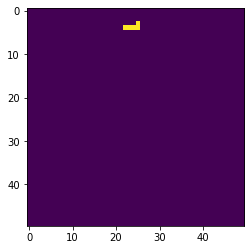

In [14]:
plt.imshow(m.map)

## Number of timesteps to cover the map

In [8]:
#number of timesteps to cover the map
len(coverage_percentage)

2496

## fraction of map covered vs timesteps

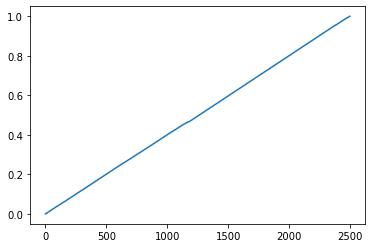

In [9]:
plt.plot(coverage_percentage)

### Cells marked visited by each agent

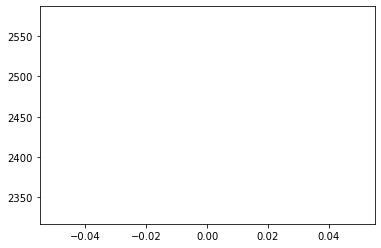

In [10]:
plt.plot(np.sort(crds))

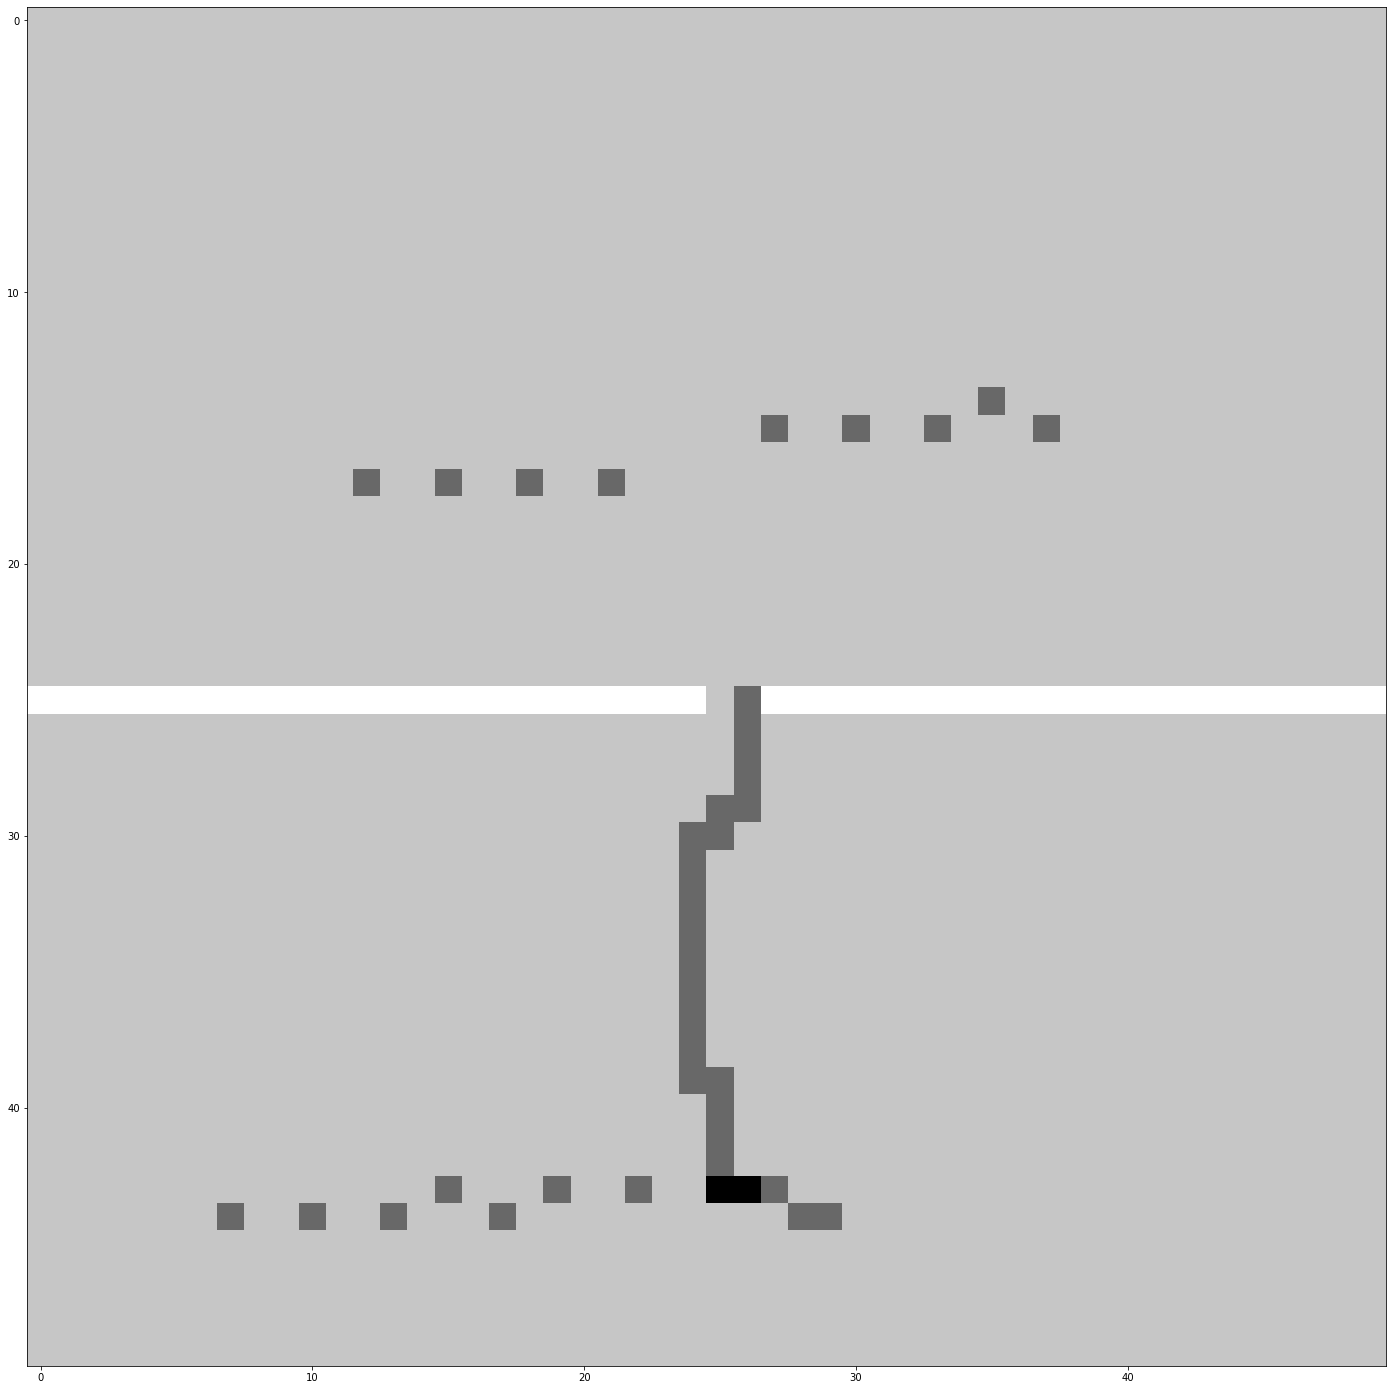

In [11]:
plt.figure(figsize=(25,25))
#mask = np.ma.masked_greater(grid,1)
#plt.imshow(grid)
plt.imshow(m.visit_frequency,cmap='Greys')
#plt.imshow(grid)

Note: %age of cells covered once, twice, thrice, 4,5,..n times can be calculated withvisitation frequency map

In [ ]:
for i in range(1,21):
    x.append(np.sum(m.visit_frequency))